In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import xgboost as xgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
import matplotlib.pyplot as plt

def sfl_defaults():
	plt.style.use('classic')
	plt.rcParams['figure.figsize'] = [8.0, 5.0]
	plt.rcParams['figure.facecolor']='w'

	# text size
	plt.rcParams['xtick.labelsize']=14
	plt.rcParams['ytick.labelsize']=14
	plt.rcParams['axes.labelsize']=15
	plt.rcParams['axes.titlesize']=16
	plt.rcParams['legend.fontsize']=12

	# grids
	plt.rcParams['grid.color'] = 'k'
	plt.rcParams['grid.linestyle'] = ':'
	plt.rcParams['grid.linewidth'] = 0.5

	# 
	print('SFL style loaded...')

sfl_defaults()

SFL style loaded...


In [3]:
# Two custom metrics for the learning curves
  # Other readily available metrics can be found in section 3.3.1.1 in: https://scikit-learn.org/stable/modules/model_evaluation.html
def neg_mape_scorer(estimator, x, y):
    """
    This function creates a scorer for negative mean percentage error
    Parameters:
    - Estimator: This is a model estimator with a predict method
    - x: This is the features for the model
    - y: This is the target variable for the model
    """
    y_pred = estimator.predict(x)
    y, y_pred = np.array(y), np.array(y_pred)
    neg_mape = - np.nanmean(np.abs((y - y_pred) / y)) * 100
    return neg_mape

def neg_rmse_scorer(estimator, x, y):
    """
    This function creates a scorer for negative root mean square error
    Parameters:
    - Estimator: This is a model estimator with a predict method
    - x: This is the features for the model
    - y: This is the target variable for the model
    """
    y_pred = estimator.predict(x)
    y_pred = estimator.predict(x)
    neg_rmse = - np.sqrt(np.mean((y - y_pred)*(y - y_pred)))
    #need to sqrt
    return neg_rmse

In [4]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    This function generate the test and training learning curves

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                      scoring=scoring_metric)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
                 label='Cross-validation score')
    plt.legend(loc='best')
    plt.title(title)
    if ylim is not None:
        plt.set_ylim(*ylim) 
    plt.xlabel('Training examples')
    plt.ylabel('Score')


    return plt

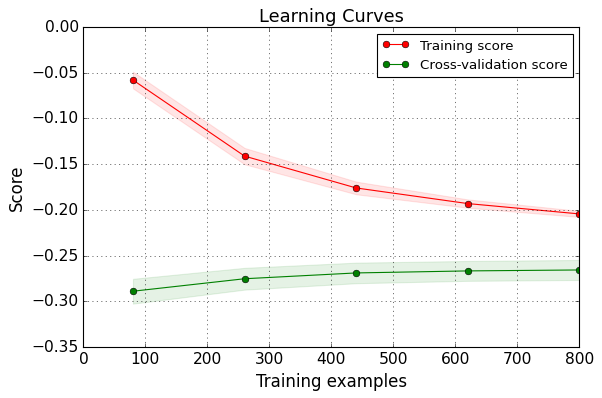

In [5]:
#dummy dataset
df = pd.DataFrame(np.random.random(size=(1000, 6)), 
                  columns=list('ABCDEY'))
y_train = df['Y']
x_train = df[['A','B','C','D','E']]

# demonstration
scoring_metric = 'neg_mean_absolute_error'
title = 'Learning Curves'

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = xgb.XGBRegressor()
plot_learning_curve(estimator, title, x_train, y_train, cv=cv, n_jobs=-1)
plt.show()